Black Hole Binary (distortion_method='none')
============================

Attempting to set a very cool temperature for a star with a large mass to mimic a black hole will likely cause out-of-bounds errors in atmosphere tables.  You can get around this slightly by using blackbody atmospheres for the compact object/black hole, but there is still significant added expense for computing the eclipse.  In cases where you only need the distortion of one star caused by the gravity of a compact object, without accounting for the presence of eclipses, you can set the compact object such that it does not even generate a mesh (or therefore any light), but still influences the distortion and dynamics of the other component(s).

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.3 installed (uncomment this line if running in an online notebook session such as colab).

In [1]:
#!pip install -I "phoebe>=2.3,<2.4"

As always, let's do imports and initialize a logger and a new bundle.

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

Adding Datasets
------------------

Now we'll create a light curve dataset, expose the mesh at quarter-phase, and compute the original model for comparison.

In [3]:
b.add_dataset('lc', compute_times=phoebe.linspace(0,1,101), dataset='lc01')
b.add_dataset('mesh', compute_times=[0.25], dataset='mesh01')

<ParameterSet: 85 parameters | contexts: constraint, compute, figure, dataset>

In [4]:
b.run_compute(model='original_model')

100%|██████████| 101/101 [00:01<00:00, 75.57it/s]


<ParameterSet: 13 parameters | kinds: mesh, lc>

Distortion Method
---------------------

Now we'll disable the meshing for the secondary component and see how that affects the resulting light curve.

In [5]:
print(b.filter(qualifier='distortion_method', context='compute'))

ParameterSet: 2 parameters
   distortion_method@primary@p...: roche
   distortion_method@secondary...: roche


In [6]:
print(b.get_parameter(qualifier='distortion_method', component='secondary', context='compute'))

Parameter: distortion_method@secondary@phoebe01@compute
                       Qualifier: distortion_method
                     Description: Method to use for distorting stars
                           Value: roche
                         Choices: roche, rotstar, sphere, none
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: mesh_method:marching,hierarchy.is_meshable:true



In [7]:
b.set_value('distortion_method', component='secondary', value='none')

**IMPORTANT NOTE**: this can affect [passband-luminosity scaling](../tutorials/pblum.ipynb).  By default, PHOEBE will scale to the set `pblum` of the primary star, so if setting `distortion_method` of the 'primary' component to 'none', then everything will scale to a flux of zero.  In this case, you will want to provide the `pblum` of the secondary star instead by switching `pblum_component` or using `pblum_mode='absolute'`.

In [14]:
print(b.filter(qualifier='pblum*'))

ParameterSet: 3 parameters
          pblum_mode@lc01@dataset: component-coupled
     pblum_component@lc01@dataset: primary
       pblum@primary@lc01@dataset: 12.566370614359172 W


In [8]:
b.run_compute(model='distortion_method_none')

100%|██████████| 101/101 [00:00<00:00, 193.51it/s]


<ParameterSet: 13 parameters | kinds: mesh, lc>

Plotting
--------------

If we plot both models (with the secondary star meshed and without), we can see that we lost half of the flux (since the stars had the same luminosity) and are only left with the ellipsoidal variations of the primary component.

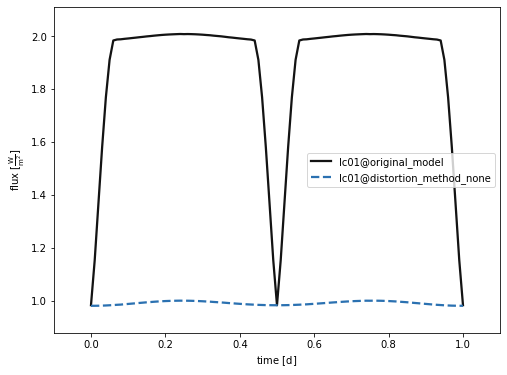

In [9]:
_ = b.plot(kind='lc', legend=True, show=True)

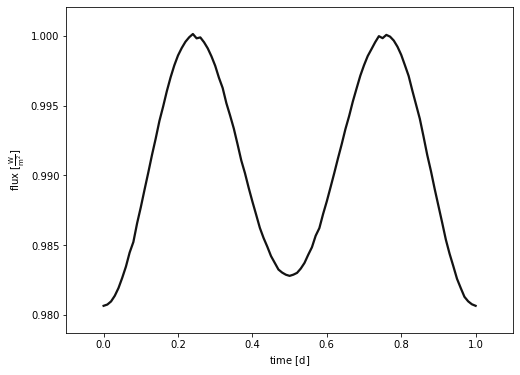

In [10]:
_ = b.plot(kind='lc', model='distortion_method_none', show=True)

And if we plot the exposed meshes, we'll see that no mesh was created for the secondary component when setting `distortion_method` to 'none'.

Tue, 01 Jun 2021 12:11 PARAMETERS   WARNING cannot plot x-dimension of secondary@mesh01, skipping


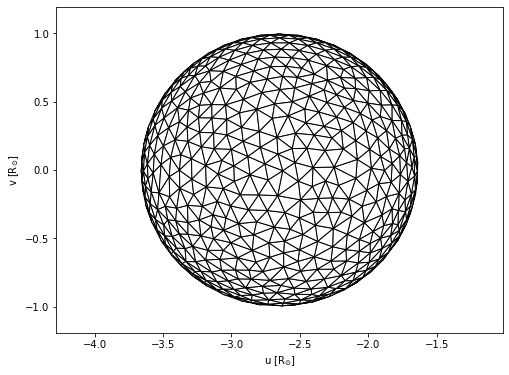

In [11]:
_ = b.plot(kind='mesh', model='distortion_method_none', show=True)

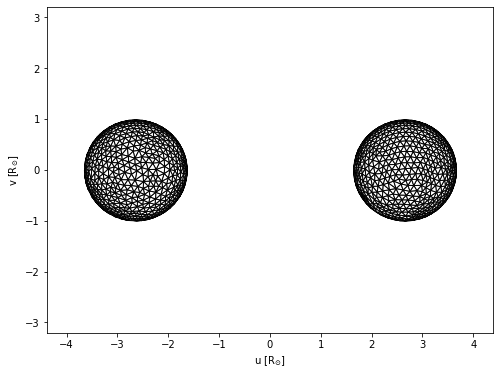

In [12]:
_ = b.plot(kind='mesh', model='original_model', show=True)